In [51]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets, __version__
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
plt.rc('font', size=15) 
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15) 
plt.rc('legend', fontsize=15)    
plt.rc('figure', titlesize=15)
import warnings
warnings.filterwarnings('ignore')



In [62]:
chd = datasets.fetch_california_housing()
df = pd.DataFrame(chd.data, columns=chd.feature_names)
df['MedHouseValue'] = pd.Series(chd.target)

In [63]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Text(0, 0.5, 'median house value')

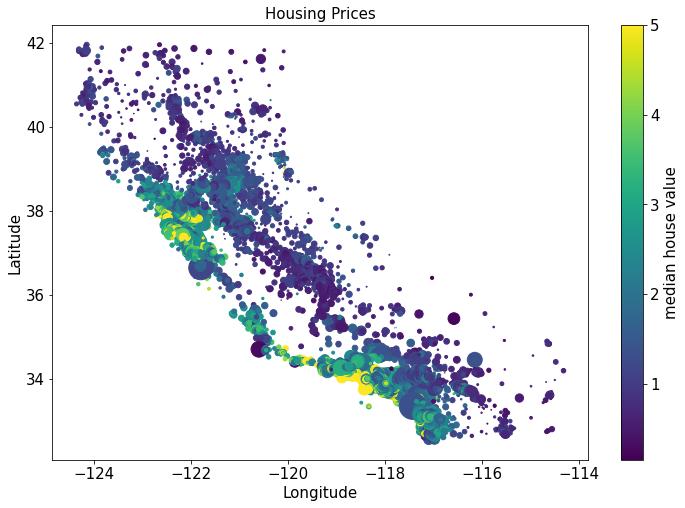

In [67]:
plt.figure(figsize=(12,8))
plt.scatter(df['Longitude'] , df['Latitude'] , c=df['MedHouseValue'],s=df['Population']/50)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Housing Prices")
plt.colorbar().ax.set_ylabel("median house value")

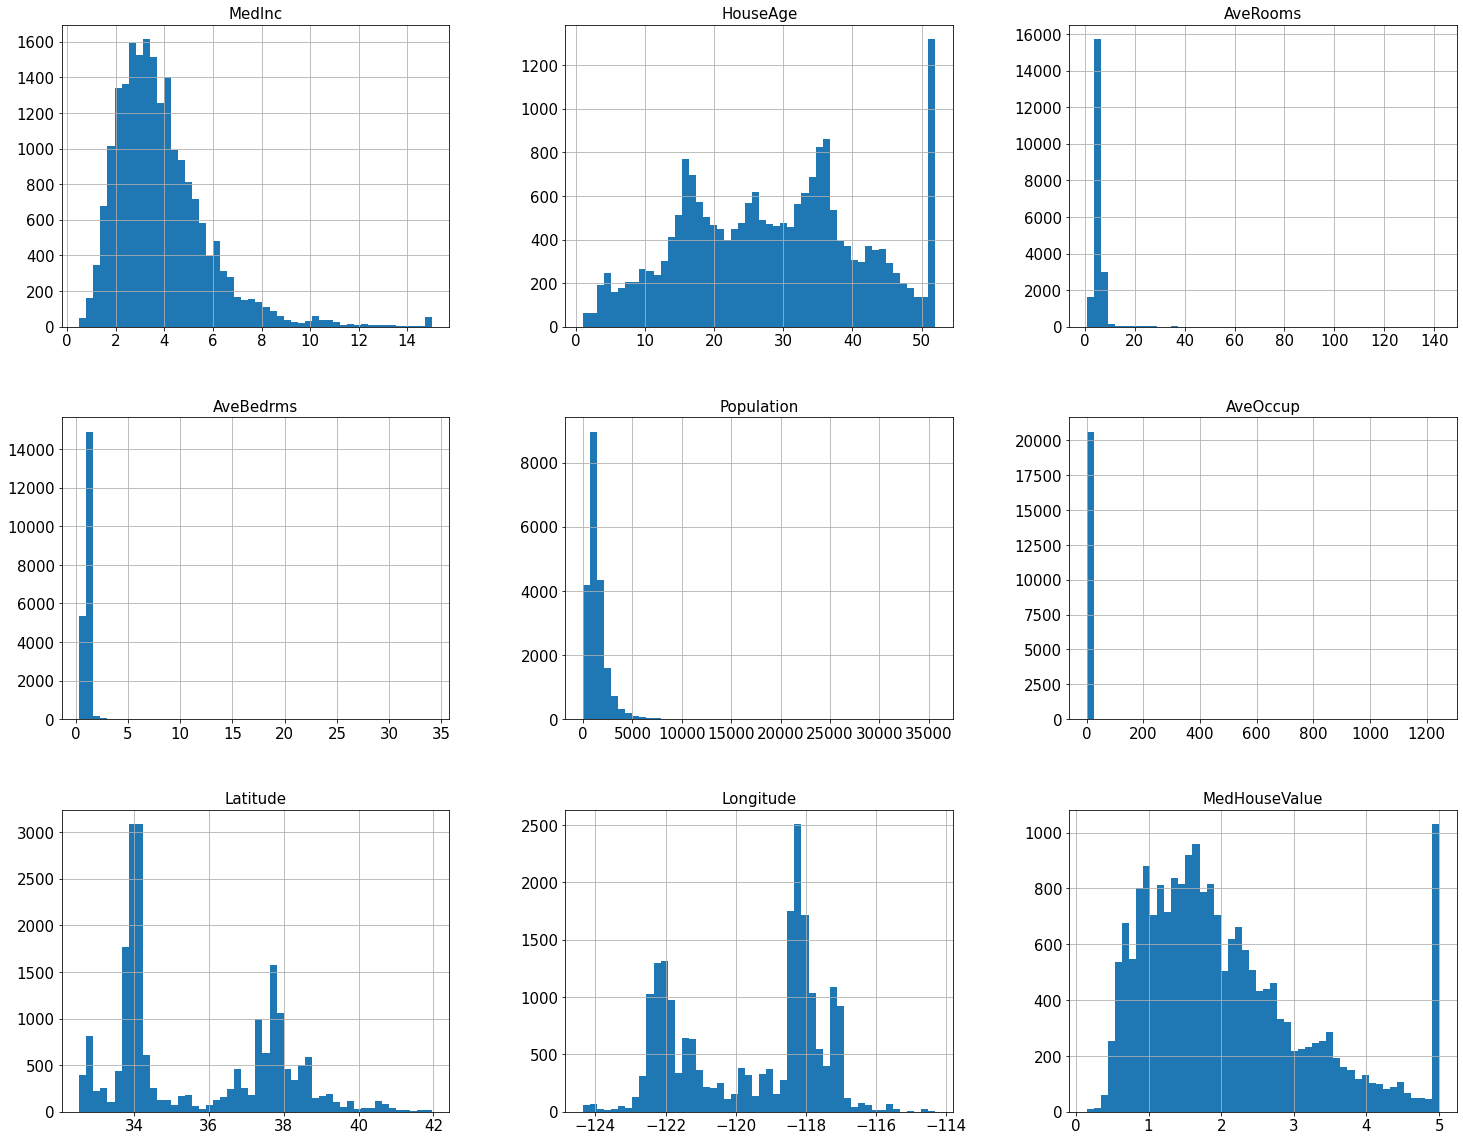

In [68]:
df.hist(bins=50, figsize=(25,20))
plt.show()

In [70]:
df_final = df.copy(deep=True)

df_final

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [71]:
df_final["household_per_room"] = df_final["AveOccup"]/df_final["AveRooms"]
df_final["bedrooms_per_room"] = df_final["AveBedrms"]/df_final["AveRooms"]
df_final["household_per_population"]= df_final["AveOccup"]/df_final["Population"]
df_final['total_income'] = df_final['MedInc']*df_final['AveOccup']

----------
# Train & test splitting

In [73]:
x = df_final.drop(['MedHouseValue'] , axis = 1).values
y = df_final['MedHouseValue'].values

In [74]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=42)

------------
## - Scaling
- Most of our data has skewing and outliers so we shall use Robust scaling

In [75]:
sd = preprocessing.RobustScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

# Modelling


In [76]:
results = pd.DataFrame(columns=['Model Name','Model state','train-set score','R²/test score','Intercept (constant)','RMSE','MAPE'])
k=pd.DataFrame()
def fit_model_result(x_train, y_train, x_test, y_test, model, model_name, model_change, alpha=-1):
    if alpha==-1:
        reg = model()
    else:
        reg = model(alpha)
    reg.fit(x_train,y_train)
    train_score = reg.score(x_train,y_train)*100
    test_score = reg.score(x_test,y_test)*100
    y_pred = reg.predict(x_test)
    dfk = pd.DataFrame({"Y_test": y_test.reshape(y_test.shape[0] ,) , "Y_pred" : y_pred.reshape(y_test.shape[0] ,)})
    plt.figure(figsize=(10,6))
    plt.plot(dfk[:50])
    plt.legend(['Actual' , 'Predicted'])
    dfk.head(10)
    try:
        const = reg.intercept_
    except:
        const = reg.y_mean_ - np.dot(reg.x_mean_ , reg.coef_)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results.loc[len(results.index)]=[model_name, model_change, train_score, test_score, const, rmse, mape]
    print(results.iloc[-1,:])
    

# - Keeping Outliers
### Modelling without taking any actions with outliers

Model Name              Linear Regression
Model state              Keeping outliers
train-set score                 62.364292
R²/test score                   61.399292
Intercept (constant)             2.008529
RMSE                             0.714683
MAPE                             0.315469
Name: 0, dtype: object


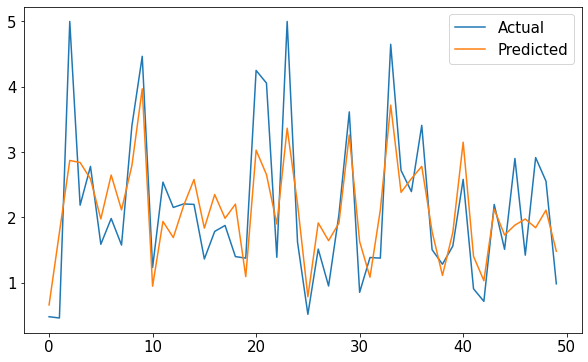

In [77]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.LinearRegression,'Linear Regression','Keeping outliers')

Model Name              Ridge Regression
Model state             Keeping outliers
train-set score                62.364208
R²/test score                  61.398334
Intercept (constant)            2.008082
RMSE                            0.714692
MAPE                            0.315425
Name: 1, dtype: object


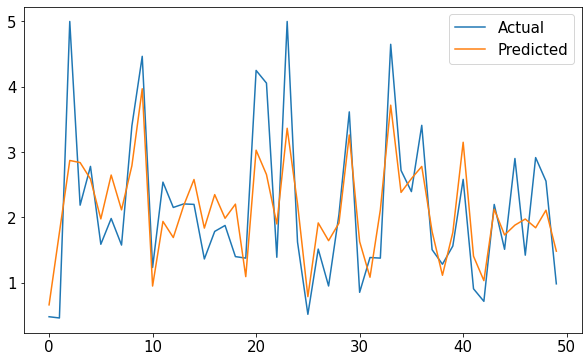

In [78]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Ridge,'Ridge Regression','Keeping outliers',1)

Model Name              Lasso Regression
Model state             Keeping outliers
train-set score                      0.0
R²/test score                  -0.003878
Intercept (constant)            2.070349
RMSE                            1.150334
MAPE                            0.629676
Name: 2, dtype: object


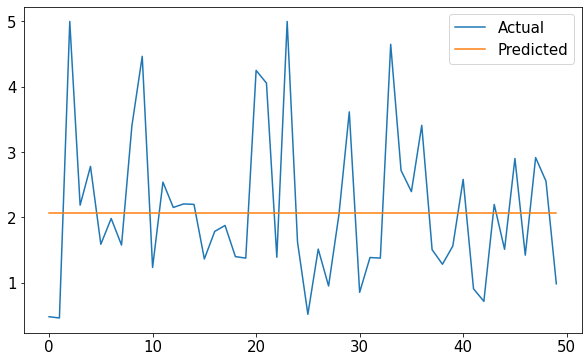

In [79]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Lasso,'Lasso Regression','Keeping outliers',1)

# - Removing Outliers
### Modelling after removing all possible outliers

In [80]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 1), size = 30, xycoords = ax.transAxes)

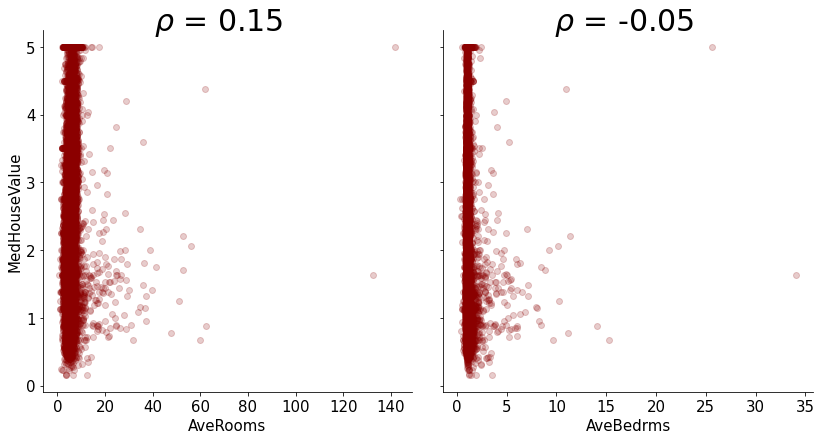

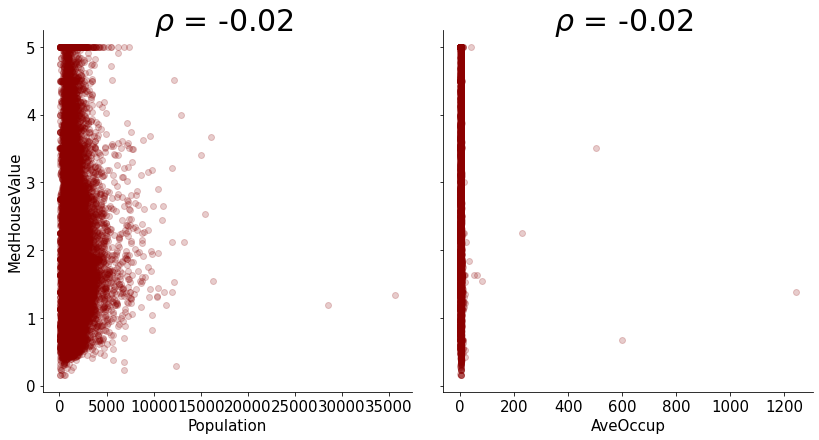

In [81]:
g = sns.PairGrid(df_final.dropna(),y_vars='MedHouseValue',x_vars=df_final[['AveRooms','AveBedrms']].columns,height=6)
g2 = sns.PairGrid(df_final,y_vars='MedHouseValue',x_vars=df_final[['Population','AveOccup']].columns,height=6)
g.map(plt.scatter,color='darkred',alpha=0.2)
g.map(corr)
g2.map(corr)
g2.map(plt.scatter,color='darkred',alpha=0.2)
plt.show()

### We will remove outliers based on their relation with the target value, and by a limit determined from observation

In [82]:
def remove_outliers(data, column, limit):
    data.drop(data[data[column]>limit].index, inplace=True)

In [83]:
df_remove = df_final.copy(deep = True)
remove_outliers(df_remove,'AveRooms',20000)
remove_outliers(df_remove,'AveBedrms',4500)
remove_outliers(df_remove,'Population',12000)
remove_outliers(df_remove,'AveOccup',4000)

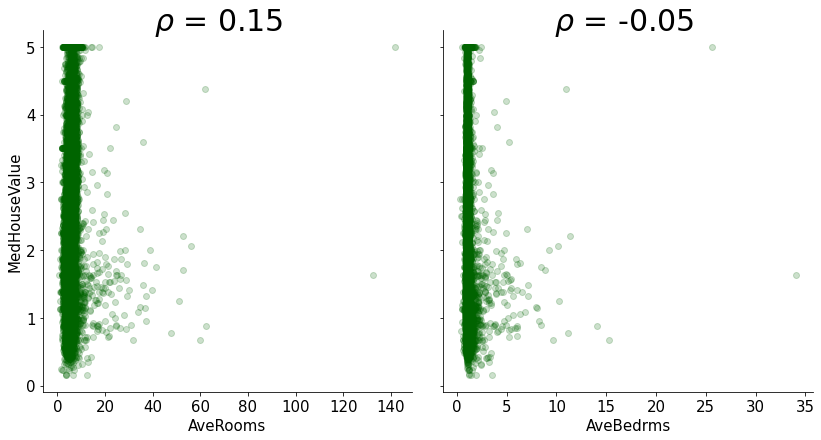

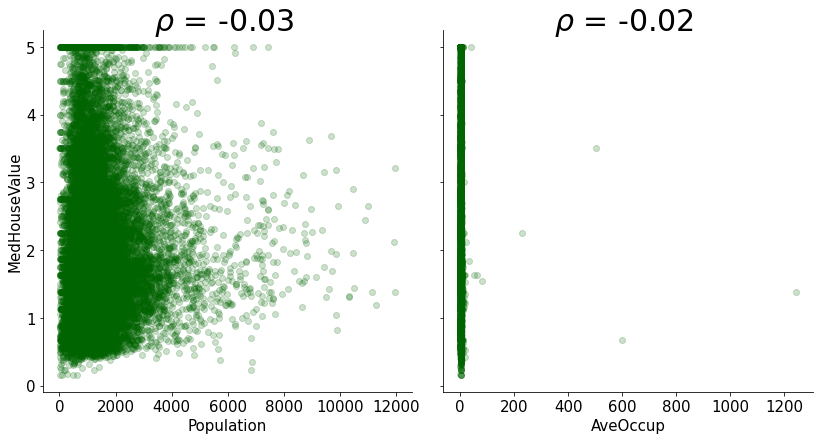

In [84]:
g = sns.PairGrid(df_remove.dropna(),y_vars='MedHouseValue',x_vars=df_remove[['AveRooms','AveBedrms']].columns,height=6)
g2 = sns.PairGrid(df_remove, y_vars='MedHouseValue',x_vars=df_remove[['Population','AveOccup']].columns,height=6)
g.map(plt.scatter,color='darkgreen',alpha=0.2)
g.map(corr)
g2.map(corr)
g2.map(plt.scatter,color='darkgreen',alpha=0.2)
plt.show()

------
## - Modelling

In [85]:
x = df_remove.drop(['MedHouseValue'] , axis = 1).values
y = df_remove['MedHouseValue'].values
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sd = preprocessing.RobustScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

Model Name              Linear Regression
Model state             Removing outliers
train-set score                  62.01803
R²/test score                    62.38975
Intercept (constant)              2.01708
RMSE                             0.712176
MAPE                             0.306748
Name: 3, dtype: object


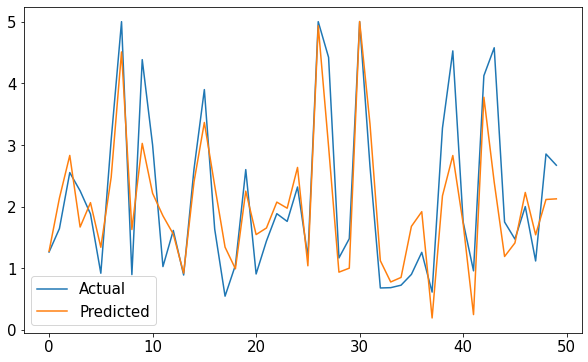

In [86]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.LinearRegression,'Linear Regression','Removing outliers')

Model Name               Lasso Regression
Model state             Removing outliers
train-set score                       0.0
R²/test score                   -0.004041
Intercept (constant)             2.070241
RMSE                             1.161297
MAPE                             0.622322
Name: 4, dtype: object


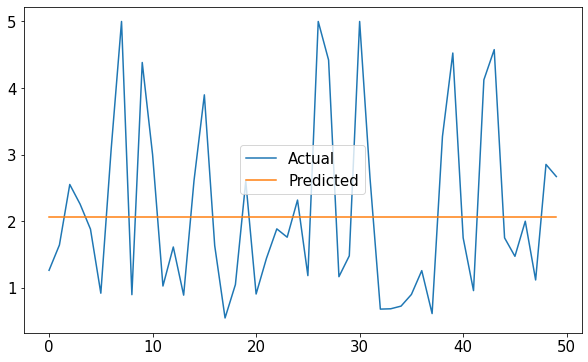

In [87]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Lasso,'Lasso Regression','Removing outliers', alpha=1)

Model Name               Ridge Regression
Model state             Removing outliers
train-set score                  62.01794
R²/test score                   62.392737
Intercept (constant)             2.016609
RMSE                             0.712148
MAPE                             0.306689
Name: 5, dtype: object


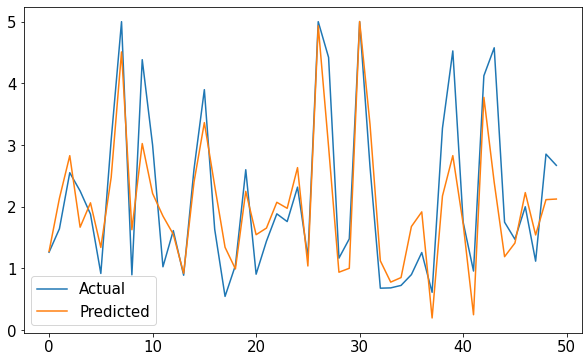

In [88]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Ridge,'Ridge Regression','Removing outliers', alpha=1)

# - Capping Outliers
### In this run, we will try not to remove the outliers, but to cap them, this technique is used to cap the minimum N% of the data to the Nth percentile value, and the maximum  M% to the (100-M)th percentile
### for example:- capping the minimum 2% of the data to the value of 2nd percentile, and capping the maximum 2% of the data to the 98th percentile

In [89]:
def corr(x, y, **kwargs):
    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.3, 1), size = 30, xycoords = ax.transAxes)

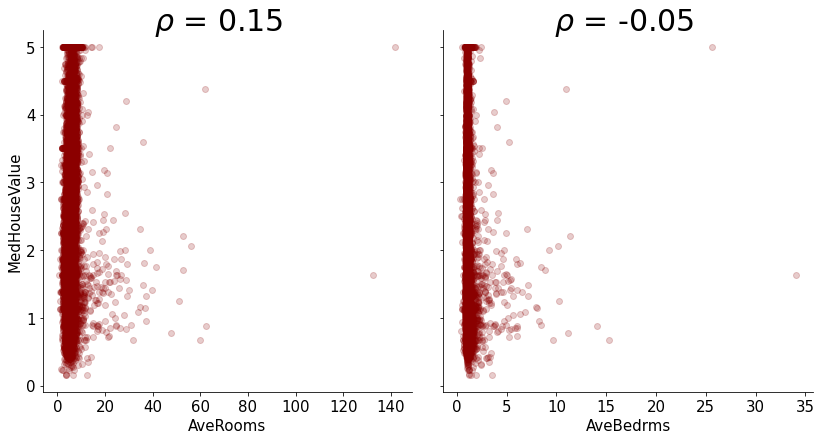

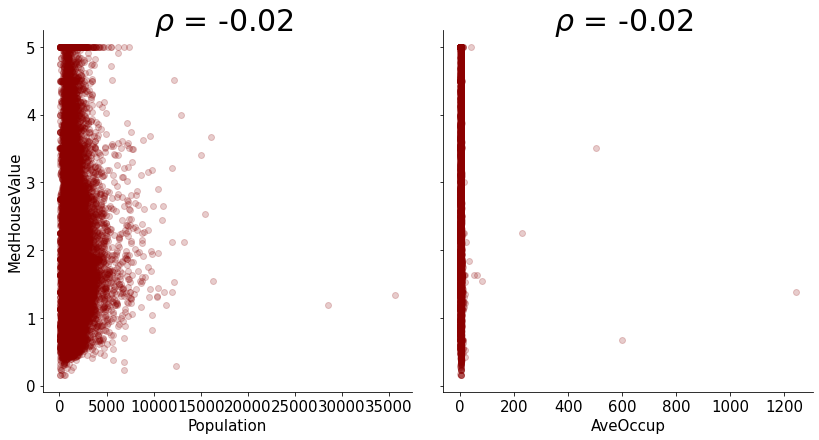

In [90]:
g = sns.PairGrid(df_final.dropna(),y_vars='MedHouseValue',x_vars=df_final[['AveRooms','AveBedrms']].columns,height=6)
g2 = sns.PairGrid(df_final,y_vars='MedHouseValue',x_vars=df_final[['Population','AveOccup']].columns,height=6)
g.map(plt.scatter,color='darkred',alpha=0.2)
g.map(corr)
g2.map(corr)
g2.map(plt.scatter,color='darkred',alpha=0.2)
plt.show()


### - We will cap the 2% highest values in our data using (winsorize) module

In [91]:
from scipy.stats.mstats import winsorize
def winsorize_col(data,cols,up_percent):
    for col in cols:
        data[col] = winsorize(data[col],[0,up_percent])

In [92]:
df_cap = df_final.copy(deep=True)
winsorize_col(df_cap,['AveRooms','AveBedrms', 'Population', 'AveOccup', 'MedInc'],0.02)

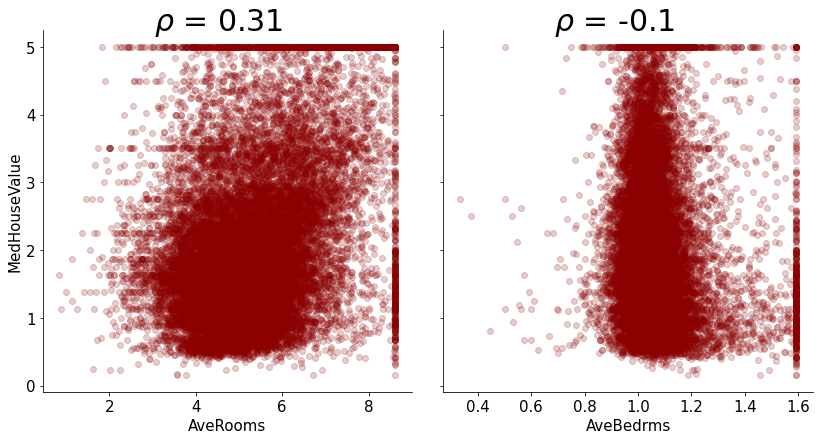

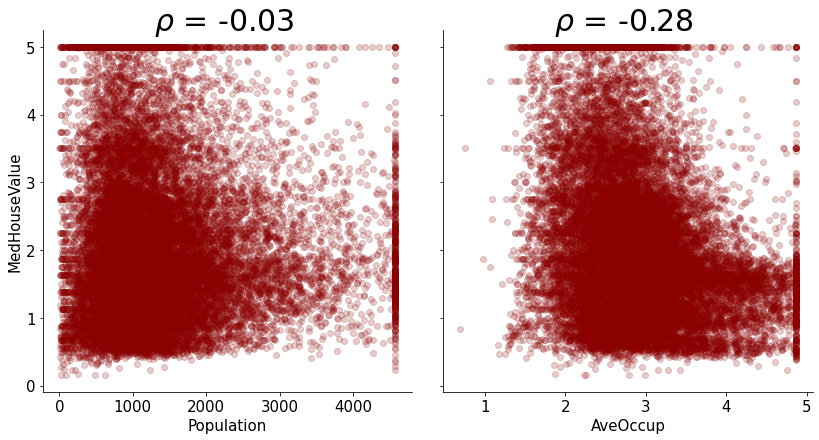

In [93]:
g = sns.PairGrid(df_cap.dropna(),y_vars='MedHouseValue',x_vars=df_cap[['AveRooms','AveBedrms']].columns,height=6)
g2 = sns.PairGrid(df_cap,y_vars='MedHouseValue',x_vars=df_cap[['Population','AveOccup']].columns,height=6)
g.map(plt.scatter,color='darkred',alpha=0.2)
g.map(corr)
g2.map(corr)
g2.map(plt.scatter,color='darkred',alpha=0.2)
plt.show()

------
## - Modelling

In [94]:
x = df_cap.drop(['MedHouseValue'] , axis = 1).values
y = df_cap['MedHouseValue'].values
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sd = preprocessing.RobustScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

Model Name              Linear Regression
Model state              Capping outliers
train-set score                 68.424428
R²/test score                   67.079752
Intercept (constant)             2.019562
RMSE                             0.660005
MAPE                             0.302493
Name: 6, dtype: object


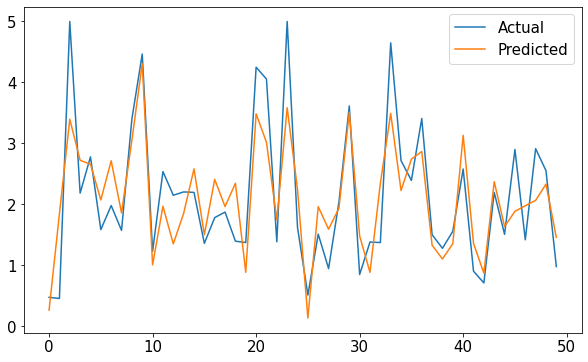

In [95]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.LinearRegression,'Linear Regression','Capping outliers')

Model Name              Ridge Regression
Model state             Capping outliers
train-set score                68.424352
R²/test score                  67.079608
Intercept (constant)            2.019148
RMSE                            0.660007
MAPE                            0.302427
Name: 7, dtype: object


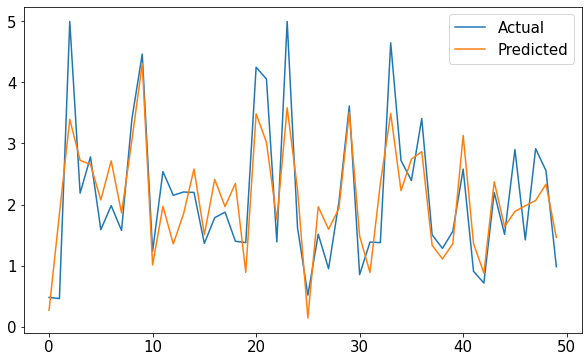

In [96]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Ridge,'Ridge Regression','Capping outliers',alpha=1)

Model Name              Lasso Regression
Model state             Capping outliers
train-set score                      0.0
R²/test score                  -0.003878
Intercept (constant)            2.070349
RMSE                            1.150334
MAPE                            0.629676
Name: 8, dtype: object


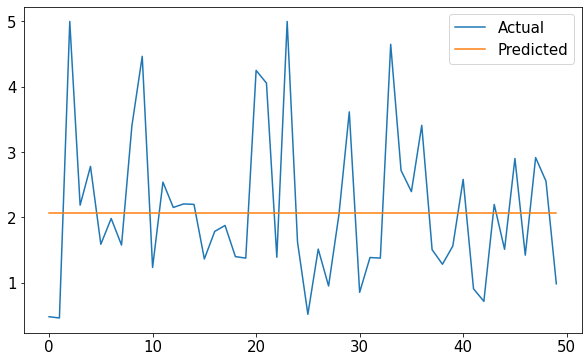

In [97]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Lasso,'Lasso Regression','Capping outliers',alpha=1)

---------
# - Dropping capped records
### As we noticed in 'Median house Value' there is a large amount of observations capped at (500,001), and this was due to the data collectors capping all the values beyond (500,00) to (500,001), in this run we will try to remove those capped records because it might affect the predictions and give wrong results.

In [98]:
df_drop = df_cap.copy(deep=True)
df_drop =df_drop[df_drop['MedHouseValue']!=500001]

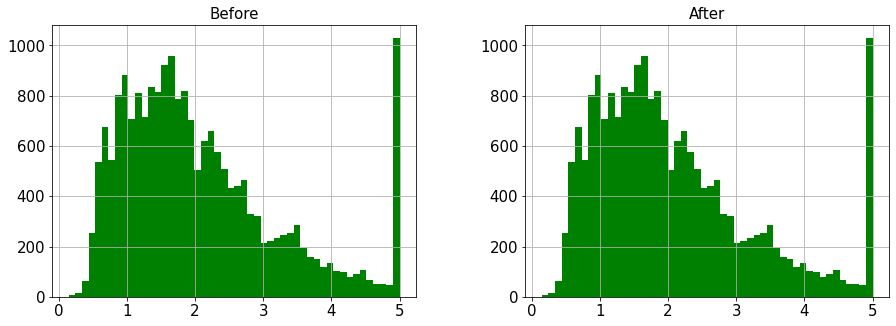

In [99]:
df_comp = pd.concat([df_cap['MedHouseValue'],df_drop['MedHouseValue']],axis=1)
df_comp.columns = ['Before','After']
df_comp.hist(bins=50, figsize=(15,5),color='green')
plt.show()

------
## - Modelling

In [100]:
x = df_drop.drop(['MedHouseValue'] , axis = 1).values
y = df_drop['MedHouseValue'].values
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sd = preprocessing.RobustScaler()
x_train = sd.fit_transform(x_train)
x_test = sd.fit_transform(x_test)

Model Name              Linear Regression
Model state                   Drop Capped
train-set score                 68.424428
R²/test score                   67.079752
Intercept (constant)             2.019562
RMSE                             0.660005
MAPE                             0.302493
Name: 9, dtype: object


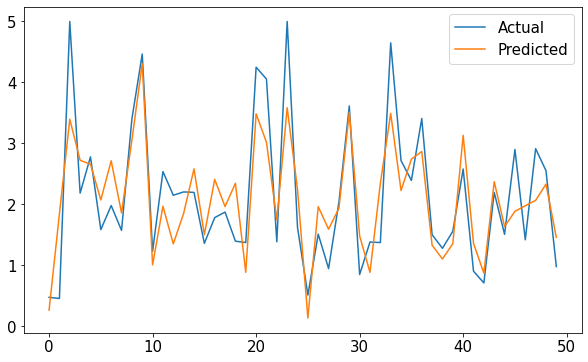

In [101]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.LinearRegression,'Linear Regression','Drop Capped')

Model Name              Ridge Regression
Model state                  Drop Capped
train-set score                68.424352
R²/test score                  67.079608
Intercept (constant)            2.019148
RMSE                            0.660007
MAPE                            0.302427
Name: 10, dtype: object


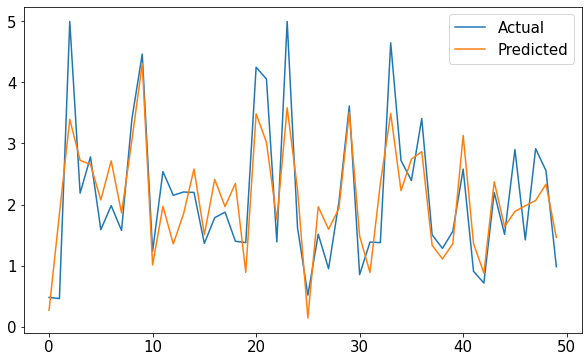

In [102]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Ridge,'Ridge Regression','Drop Capped',alpha=1)

Model Name              Lasso Regression
Model state                  Drop Capped
train-set score                      0.0
R²/test score                  -0.003878
Intercept (constant)            2.070349
RMSE                            1.150334
MAPE                            0.629676
Name: 11, dtype: object


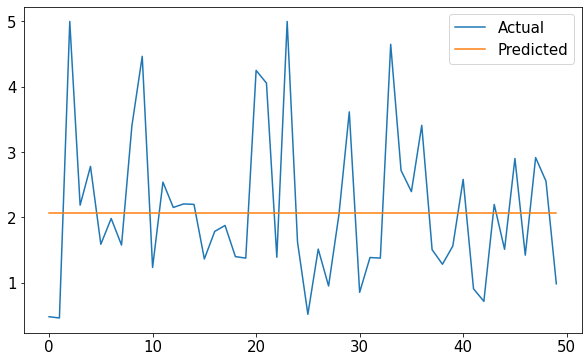

In [103]:
fit_model_result(x_train,y_train,x_test,y_test,linear_model.Lasso,'Lasso Regression','Drop Capped',alpha=1)

## Final results sorted by R²/test score

In [105]:
results.groupby(['Model Name','Model state']).first().sort_values(ascending=False, by='R²/test score')

train-set score  R²/test score  \
Model Name        Model state                                         
Linear Regression Capping outliers         68.424428      67.079752   
                  Drop Capped              68.424428      67.079752   
Ridge Regression  Capping outliers         68.424352      67.079608   
                  Drop Capped              68.424352      67.079608   
                  Removing outliers        62.017940      62.392737   
Linear Regression Removing outliers        62.018030      62.389750   
                  Keeping outliers         62.364292      61.399292   
Ridge Regression  Keeping outliers         62.364208      61.398334   
Lasso Regression  Capping outliers          0.000000      -0.003878   
                  Drop Capped               0.000000      -0.003878   
                  Keeping outliers          0.000000      -0.003878   
                  Removing outliers         0.000000      -0.004041   

                                     Intercept (constant)      RMSE      MAPE  
Model Name        Model state                                                  
Linear Regression Capping outliers               2.019562  0.660005  0.302493  
                  Drop Capped                    2.019562  0.660005  0.302493  
Ridge Regression  Capping outliers               2.019148  0.660007  0.302427  
                  Drop Capped                    2.019148  0.660007  0.302427  
                  Removing outliers              2.016609  0.712148  0.306689  
Linear Regression Removing outliers              2.017080  0.712176  0.306748  
                  Keeping outliers               2.008529  0.714683  0.315469  
Ridge Regression  Keeping outliers               2.008082  0.714692  0.315425  
Lasso Regression  Capping outliers               2.070349  1.150334  0.629676  
                  Drop Capped                    2.070349  1.150334  0.629676  
                  Keeping outliers               2.070349  1.150334  0.629676  
                  Removing outliers              2.070241  1.161297  0.622322

## Final results unsorted

In [106]:
results.groupby(['Model Name','Model state']).first()

train-set score  R²/test score  \
Model Name        Model state                                         
Lasso Regression  Capping outliers          0.000000      -0.003878   
                  Drop Capped               0.000000      -0.003878   
                  Keeping outliers          0.000000      -0.003878   
                  Removing outliers         0.000000      -0.004041   
Linear Regression Capping outliers         68.424428      67.079752   
                  Drop Capped              68.424428      67.079752   
                  Keeping outliers         62.364292      61.399292   
                  Removing outliers        62.018030      62.389750   
Ridge Regression  Capping outliers         68.424352      67.079608   
                  Drop Capped              68.424352      67.079608   
                  Keeping outliers         62.364208      61.398334   
                  Removing outliers        62.017940      62.392737   

                                     Intercept (constant)      RMSE      MAPE  
Model Name        Model state                                                  
Lasso Regression  Capping outliers               2.070349  1.150334  0.629676  
                  Drop Capped                    2.070349  1.150334  0.629676  
                  Keeping outliers               2.070349  1.150334  0.629676  
                  Removing outliers              2.070241  1.161297  0.622322  
Linear Regression Capping outliers               2.019562  0.660005  0.302493  
                  Drop Capped                    2.019562  0.660005  0.302493  
                  Keeping outliers               2.008529  0.714683  0.315469  
                  Removing outliers              2.017080  0.712176  0.306748  
Ridge Regression  Capping outliers               2.019148  0.660007  0.302427  
                  Drop Capped                    2.019148  0.660007  0.302427  
                  Keeping outliers               2.008082  0.714692  0.315425  
                  Removing outliers              2.016609  0.712148  0.306689